In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoids', 'proanthocyanins', 'color', 'hue', 'od280/315', 'proline']
df_wine = pd.read_csv(data)
df_wine.columns = columns
df_wine.head()

,class,alcohol,malic acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,od280/315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [0]:
def train_test_split(X, y=None, split_ratio=0.3, random_state=123, stype="separate"):
  np.random.seed(random_state)
  if stype=="separate":
    split = np.random.rand(X.shape[0]) < split_ratio
    return X[~split], X[split], y[~split], y[split]
  elif stype=="whole":
    split = np.random.rand(X.shape[0]) < split_ratio
    return X[~split], X[split] 

In [0]:
X = df_wine.iloc[:, 1:]
y = df_wine["class"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# XGBOOST

In [0]:
import xgboost
from xgboost import XGBClassifier
# Classification report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [7]:
# Initialize the model and set the hyperparameter values
xgb_model = XGBClassifier(max_depth=2, n_estimators=30)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [8]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7)
# Perform K-Fold Cross Validation
results = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 88.99% (4.61%)


In [9]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

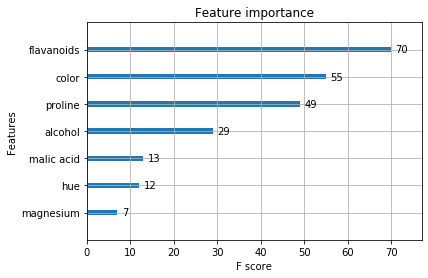

In [10]:
# Plot the top 7 features
xgboost.plot_importance(xgb_model, max_num_features=7)
# Show the plot
plt.show()

In [11]:
# Predict the trading signal on test dataset
y_pred = xgb_model.predict(X_test)
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        13

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



**REGRESSION**

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
reg = XGBRegressor(learning_rate=0.3,verbosity=0,booster='gbtree',n_estimators=1000,early_stopping_rounds=5)

reg.fit(X_train,y_train)
# Make predictions
pred_y2 = reg.predict(X_test)

# Calculate MAE
print("Mean Absolute Error : " + str(mean_absolute_error(pred_y2, y_test)))

Mean Absolute Error : 0.1029444874786749


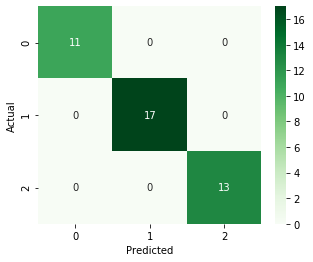

In [13]:
array = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array)
plt.figure(figsize=(5, 4))
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **CATBOOST**

In [15]:
!pip install catboost
from catboost import CatBoostClassifier
import catboost

     |████████████████████████████████| 64.4MB 60kB/s 


In [16]:
cb_model = CatBoostClassifier(max_depth=2, n_estimators=30)
cb_model

In [17]:
cb_model.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.6664718	total: 46.7ms	remaining: 1.35s
1:	learn: 0.4903469	total: 47.2ms	remaining: 661ms
2:	learn: 0.3635555	total: 47.6ms	remaining: 429ms
3:	learn: 0.3275918	total: 48ms	remaining: 312ms
4:	learn: 0.2675915	total: 48.5ms	remaining: 242ms
5:	learn: 0.2181489	total: 48.9ms	remaining: 196ms
6:	learn: 0.2019687	total: 49.3ms	remaining: 162ms
7:	learn: 0.1636832	total: 49.7ms	remaining: 137ms
8:	learn: 0.1496846	total: 50.1ms	remaining: 117ms
9:	learn: 0.1477282	total: 50.6ms	remaining: 101ms
10:	learn: 0.1340887	total: 51ms	remaining: 88.1ms
11:	learn: 0.1171634	total: 51.5ms	remaining: 77.2ms
12:	learn: 0.1000404	total: 51.9ms	remaining: 67.9ms
13:	learn: 0.0923761	total: 52.3ms	remaining: 59.8ms
14:	learn: 0.0847188	total: 52.8ms	remaining: 52.8ms
15:	learn: 0.0769574	total: 53.2ms	remaining: 46.6ms
16:	learn: 0.0760657	total: 53.6ms	remaining: 41ms
17:	learn: 0.0749492	total: 54ms	remaining: 36ms
18:	learn: 0.0741778	total: 54.4ms	remaining: 31.5m

In [18]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7)
# Perform K-Fold Cross Validation
results = cross_val_score(cb_model, X_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Learning rate set to 0.5
0:	learn: 0.6921044	total: 464us	remaining: 13.5ms
1:	learn: 0.5114732	total: 821us	remaining: 11.5ms
2:	learn: 0.4137879	total: 1.2ms	remaining: 10.8ms
3:	learn: 0.3280561	total: 1.58ms	remaining: 10.3ms
4:	learn: 0.2721599	total: 1.97ms	remaining: 9.85ms
5:	learn: 0.2238736	total: 2.33ms	remaining: 9.33ms
6:	learn: 0.1848322	total: 2.78ms	remaining: 9.15ms
7:	learn: 0.1587467	total: 3.13ms	remaining: 8.61ms
8:	learn: 0.1493126	total: 3.46ms	remaining: 8.07ms
9:	learn: 0.1312335	total: 3.81ms	remaining: 7.61ms
10:	learn: 0.1181466	total: 4.15ms	remaining: 7.16ms
11:	learn: 0.1014301	total: 4.51ms	remaining: 6.77ms
12:	learn: 0.0928452	total: 4.89ms	remaining: 6.4ms
13:	learn: 0.0850190	total: 5.27ms	remaining: 6.03ms
14:	learn: 0.0754955	total: 5.63ms	remaining: 5.63ms
15:	learn: 0.0688724	total: 5.99ms	remaining: 5.24ms
16:	learn: 0.0612593	total: 6.37ms	remaining: 4.87ms
17:	learn: 0.0555330	total: 6.78ms	remaining: 4.52ms
18:	learn: 0.0533723	total: 7.13ms	

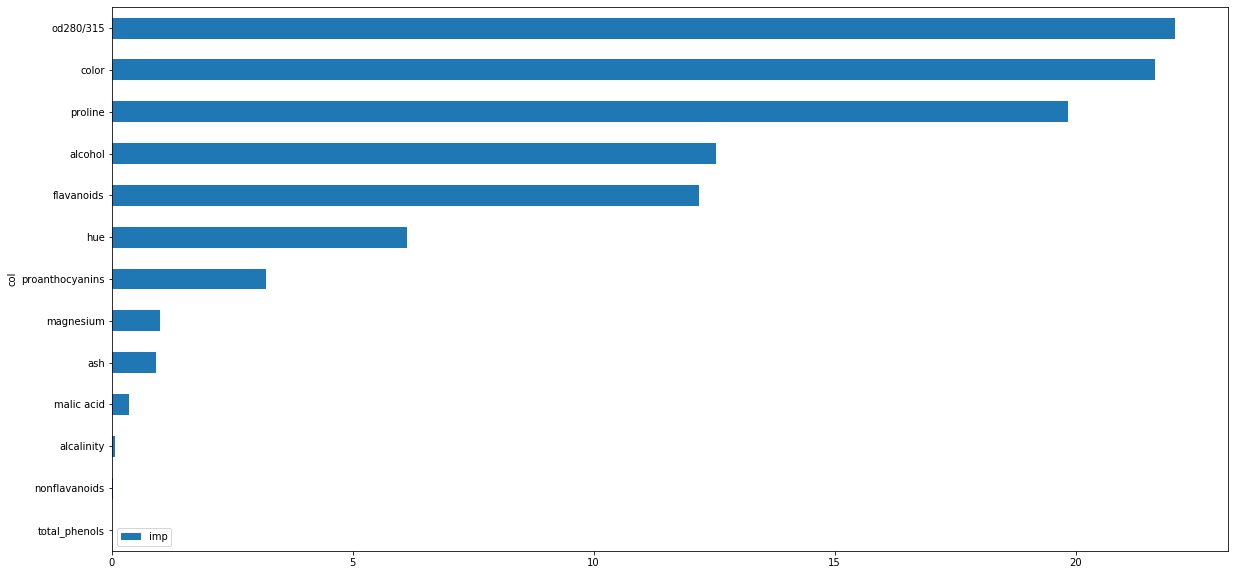

In [19]:
# Feature Importance
fea_imp = pd.DataFrame({'imp': cb_model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [20]:
# Predict the trading signal on test dataset
y_pred = cb_model.predict(X_test)
# Get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        13

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



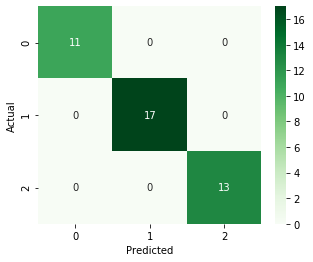

In [21]:
array = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(array)
plt.figure(figsize=(5, 4))
sn.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()